In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, f1_score, accuracy_score, recall_score

In [2]:
df = pd.read_csv('salaries.csv')

In [3]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
df.sample(10)

,company,job,degree,salary_more_then_100k
6,abc pharma,sales executive,masters,0
14,facebook,computer programmer,bachelors,1
3,google,business manager,masters,1
15,facebook,computer programmer,masters,1
1,google,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
5,google,computer programmer,masters,1
9,abc pharma,business manager,masters,1
10,facebook,sales executive,bachelors,1
11,facebook,sales executive,masters,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
salary_more_then_100k,16.0,0.625,0.5,0.0,0.0,1.0,1.0,1.0


In [7]:
encoder = LabelEncoder()
df[['company', 'job', 'degree']] = df[['company', 'job', 'degree']].apply(encoder.fit_transform) 

In [8]:
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


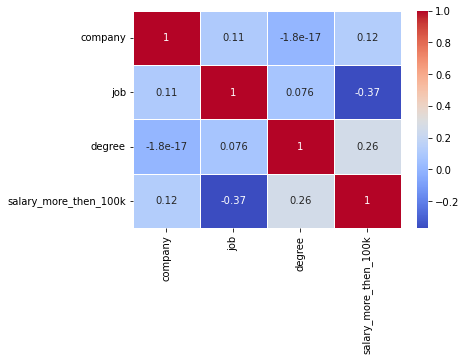

In [9]:
corr_matrix = df.corr()
if not corr_matrix.empty:
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()
else:
    print("Correlation matrix is empty. Please check your data.")

In [10]:
model_1 = DecisionTreeClassifier()
model_2 = DecisionTreeClassifier(criterion = 'entropy')
model_3 = DecisionTreeClassifier(criterion = 'log_loss')

In [11]:
X = df.drop('salary_more_then_100k', axis='columns')

In [12]:
y = df['salary_more_then_100k']

In [13]:
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [14]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [15]:
model_1.fit(X, y)
model_2.fit(X, y)
model_3.fit(X, y)

DecisionTreeClassifier(criterion='log_loss')

In [16]:
y_pred_1 = model_1.predict(X)
y_pred_2 = model_2.predict(X)
y_pred_3 = model_3.predict(X)

In [17]:
print('\033[1mscore of gini algorithm:\033[0m {0}% \n\033[1mscore of entorpy algorithm:\033[0m {1}% \n\033[1mscore of log_loss algorithm:\033[0m {2}%'.format(model_1.score(X,y)* 100, model_2.score(X,y)* 100, model_3.score(X,y)* 100))

score of gini algorithm: 100.0% 
score of entorpy algorithm: 100.0% 
score of log_loss algorithm: 100.0%


In [18]:
print('*'*60)
print('\033[1mClassification Report of gini algorithm:\033[0m \n{0}'.format(classification_report(y, y_pred_1)))
print('*'*60)
print('\033[1mClassification Report of entorpy algorithm:\033[0m \n{0}'.format(classification_report(y, y_pred_2)))
print('*'*60)
print('\033[1mClassification Report of log_loss algorithm:\033[0m \n{0}'.format(classification_report(y, y_pred_3)))
print('*'*60)

************************************************************
Classification Report of gini algorithm: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

************************************************************
Classification Report of entorpy algorithm: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

************************************************************
Classification Report of log_loss algorithm: 
              precision    rec

In [19]:
print('*'*60)
print('\033[1mConfusion Matrix of gini algorithm:\033[0m \n{0}'.format(confusion_matrix(y, y_pred_1)))
print('*'*60)
print('\033[1mConfusion Matrix of entorpy algorithm:\033[0m \n{0}'.format(confusion_matrix(y, y_pred_2)))
print('*'*60)
print('\033[1mConfusion Matrix of log_loss algorithm:\033[0m \n{0}'.format(confusion_matrix(y, y_pred_3)))
print('*'*60)

************************************************************
Confusion Matrix of gini algorithm: 
[[ 6  0]
 [ 0 10]]
************************************************************
Confusion Matrix of entorpy algorithm: 
[[ 6  0]
 [ 0 10]]
************************************************************
Confusion Matrix of log_loss algorithm: 
[[ 6  0]
 [ 0 10]]
************************************************************


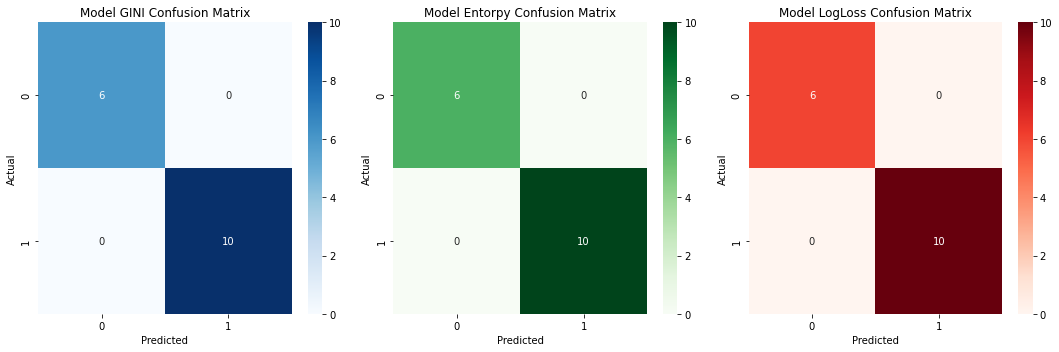

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(confusion_matrix(y, y_pred_1), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Model GINI Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y, y_pred_2), annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Model Entorpy Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y, y_pred_3), annot=True, fmt='d', ax=axes[2], cmap='Reds')
axes[2].set_title('Model LogLoss Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [21]:
print('*'*60)
print('\033[1mAccuracy of gini algorithm:\033[0m {0} %'.format(accuracy_score(y, y_pred_1)*100))
print('*'*60)
print('\033[1mAccuracy of entorpy algorithm:\033[0m {0} %'.format(accuracy_score(y, y_pred_2)*100))
print('*'*60)
print('\033[1mAccuracy of log_loss algorithm:\033[0m {0} %'.format(accuracy_score(y, y_pred_3)*100))
print('*'*60)

************************************************************
Accuracy of gini algorithm: 100.0 %
************************************************************
Accuracy of entorpy algorithm: 100.0 %
************************************************************
Accuracy of log_loss algorithm: 100.0 %
************************************************************


In [22]:
print('*'*60)
print('\033[1mF1_score of gini algorithm:\033[0m {0} %'.format(f1_score(y, y_pred_1)*100))
print('*'*60)
print('\033[1mF1_score of entorpy algorithm:\033[0m {0} %'.format(f1_score(y, y_pred_2)*100))
print('*'*60)
print('\033[1mF1_score of log_loss algorithm: {0} %'.format(f1_score(y, y_pred_3)*100))
print('*'*60)

************************************************************
F1_score of gini algorithm: 100.0 %
************************************************************
F1_score of entorpy algorithm: 100.0 %
************************************************************
F1_score of log_loss algorithm: 100.0 %
************************************************************


In [23]:
print('*'*60)
print('\033[1mRecall of gini algorithm:\033[0m {0} %'.format(recall_score(y, y_pred_1)*100))
print('*'*60)
print('\033[1mRecall of entorpy algorithm:\033[0m {0} %'.format(recall_score(y, y_pred_2)*100))
print('*'*60)
print('\033[1mRecall of log_loss algorithm:\033[0m {0} %'.format(recall_score(y, y_pred_3)*100))
print('*'*60)

************************************************************
Recall of gini algorithm: 100.0 %
************************************************************
Recall of entorpy algorithm: 100.0 %
************************************************************
Recall of log_loss algorithm: 100.0 %
************************************************************


In [24]:
print('*'*60)
print('\033[1mprecision of gini algorithm:\033[0m {0} %'.format(precision_score(y, y_pred_1)*100))
print('*'*60)
print('\033[1mprecision of entorpy algorithm:\033[0m {0} %'.format(precision_score(y, y_pred_2)*100))
print('*'*60)
print('\033[1mprecision of log_loss algorithm:\033[0m {0} %'.format(precision_score(y, y_pred_3)*100))
print('*'*60)

************************************************************
precision of gini algorithm: 100.0 %
************************************************************
precision of entorpy algorithm: 100.0 %
************************************************************
precision of log_loss algorithm: 100.0 %
************************************************************


In [25]:
df_evaluation = pd.DataFrame({
    'Algorithm': ['GINI', 'Entropy', 'LogLoss'],
    'Score': [f"{model_1.score(X, y) * 100:.2f}%", f"{model_2.score(X, y) * 100:.2f}%", f"{model_3.score(X, y) * 100:.2f}%"],
    'Accuracy': [f"{accuracy_score(y, y_pred_1) * 100:.2f}%", f"{accuracy_score(y, y_pred_2) * 100:.2f}%", f"{accuracy_score(y, y_pred_3) * 100:.2f}%"],
    'Precision': [f"{precision_score(y, y_pred_1) * 100:.2f}%", f"{precision_score(y, y_pred_2) * 100:.2f}%", f"{precision_score(y, y_pred_3) * 100:.2f}%"],
    'Recall': [f"{recall_score(y, y_pred_1) * 100:.2f}%", f"{recall_score(y, y_pred_2) * 100:.2f}%", f"{recall_score(y, y_pred_3) * 100:.2f}%"],
    'F1_score': [f"{f1_score(y, y_pred_1) * 100:.2f}%", f"{f1_score(y, y_pred_2) * 100:.2f}%", f"{f1_score(y, y_pred_3) * 100:.2f}%"]
})

In [26]:
df_evaluation

,Algorithm,Score,Accuracy,Precision,Recall,F1_score
0,GINI,100.00%,100.00%,100.00%,100.00%,100.00%
1,Entropy,100.00%,100.00%,100.00%,100.00%,100.00%
2,LogLoss,100.00%,100.00%,100.00%,100.00%,100.00%
